In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
%ls 'data/wine/'

winequality.names*  winequality-red.csv*  winequality-white.csv*


In [3]:
red = pd.read_csv('data/wine/winequality-red.csv', sep =';')
white = pd.read_csv('data/wine/winequality-white.csv', sep=';')

red_train, red_test = train_test_split(red, test_size=0.33)
white_train, white_test = train_test_split(white, test_size=0.33)
red_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,7
1380,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.8,6
434,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6
402,12.2,0.48,0.54,2.6,0.085,19.0,64.0,1.00000,3.10,0.61,10.5,6
1328,6.5,0.52,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5


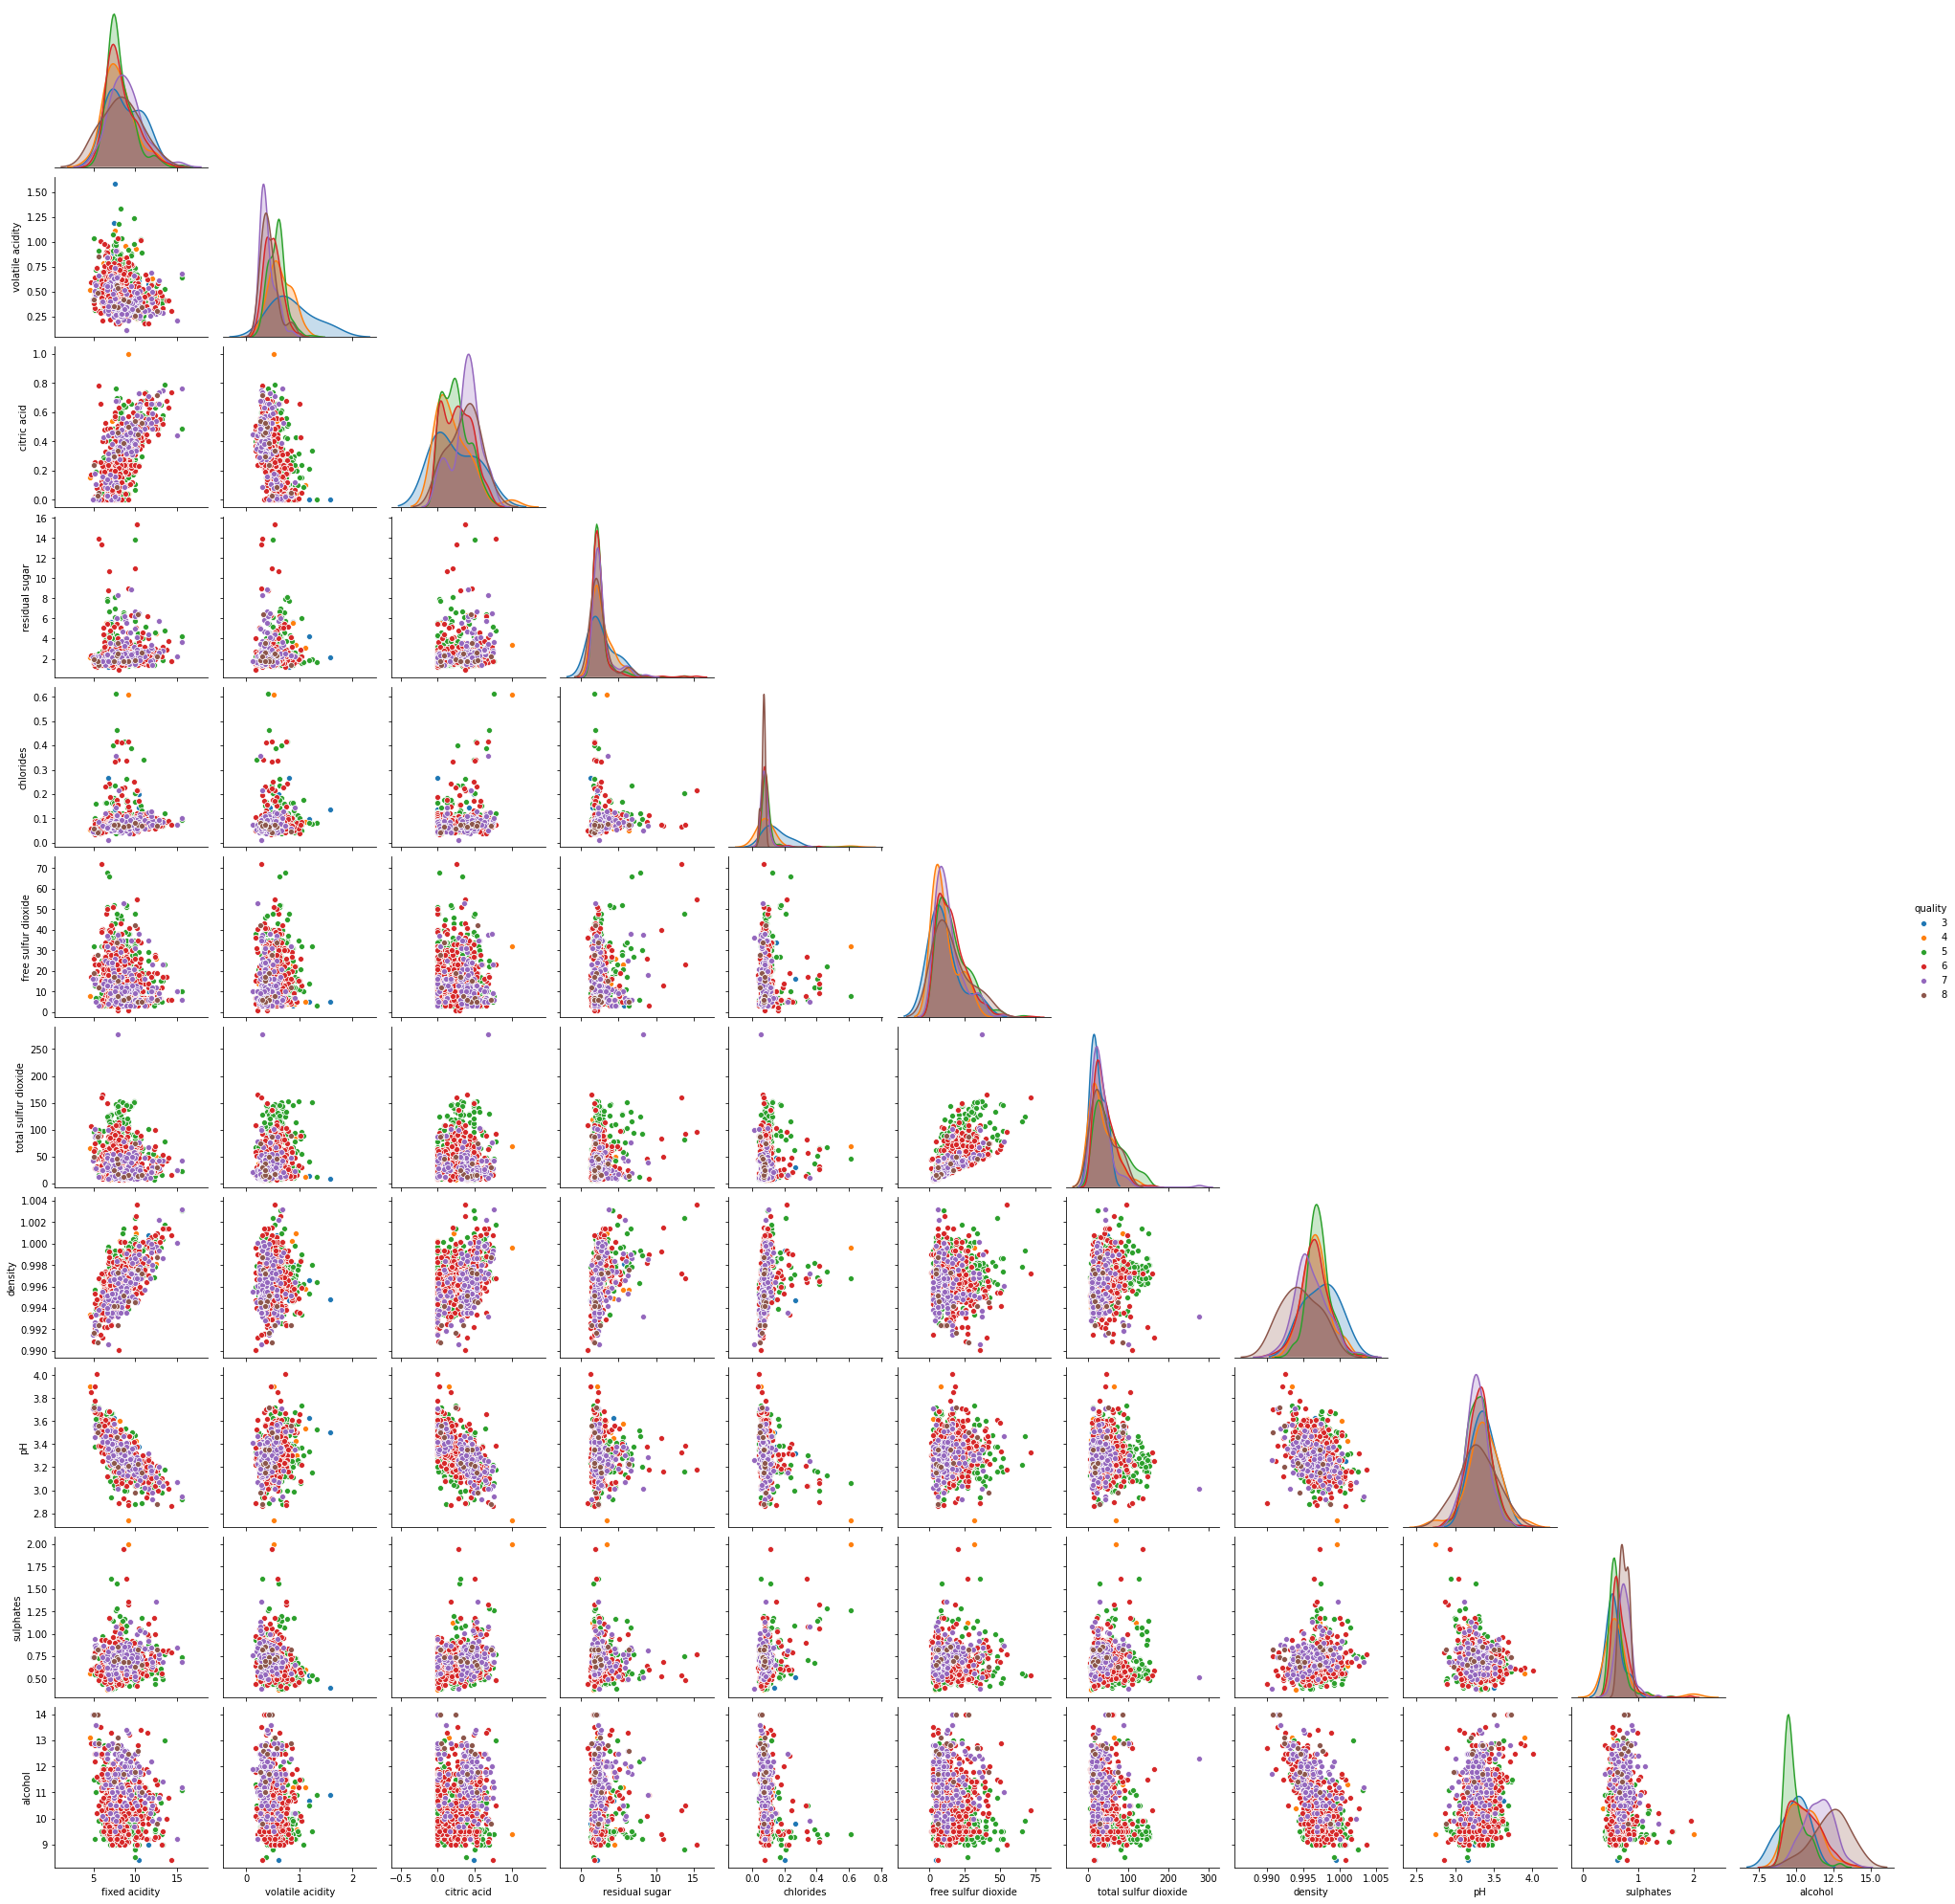

In [4]:
sns.pairplot(red_train, hue="quality", corner=True)

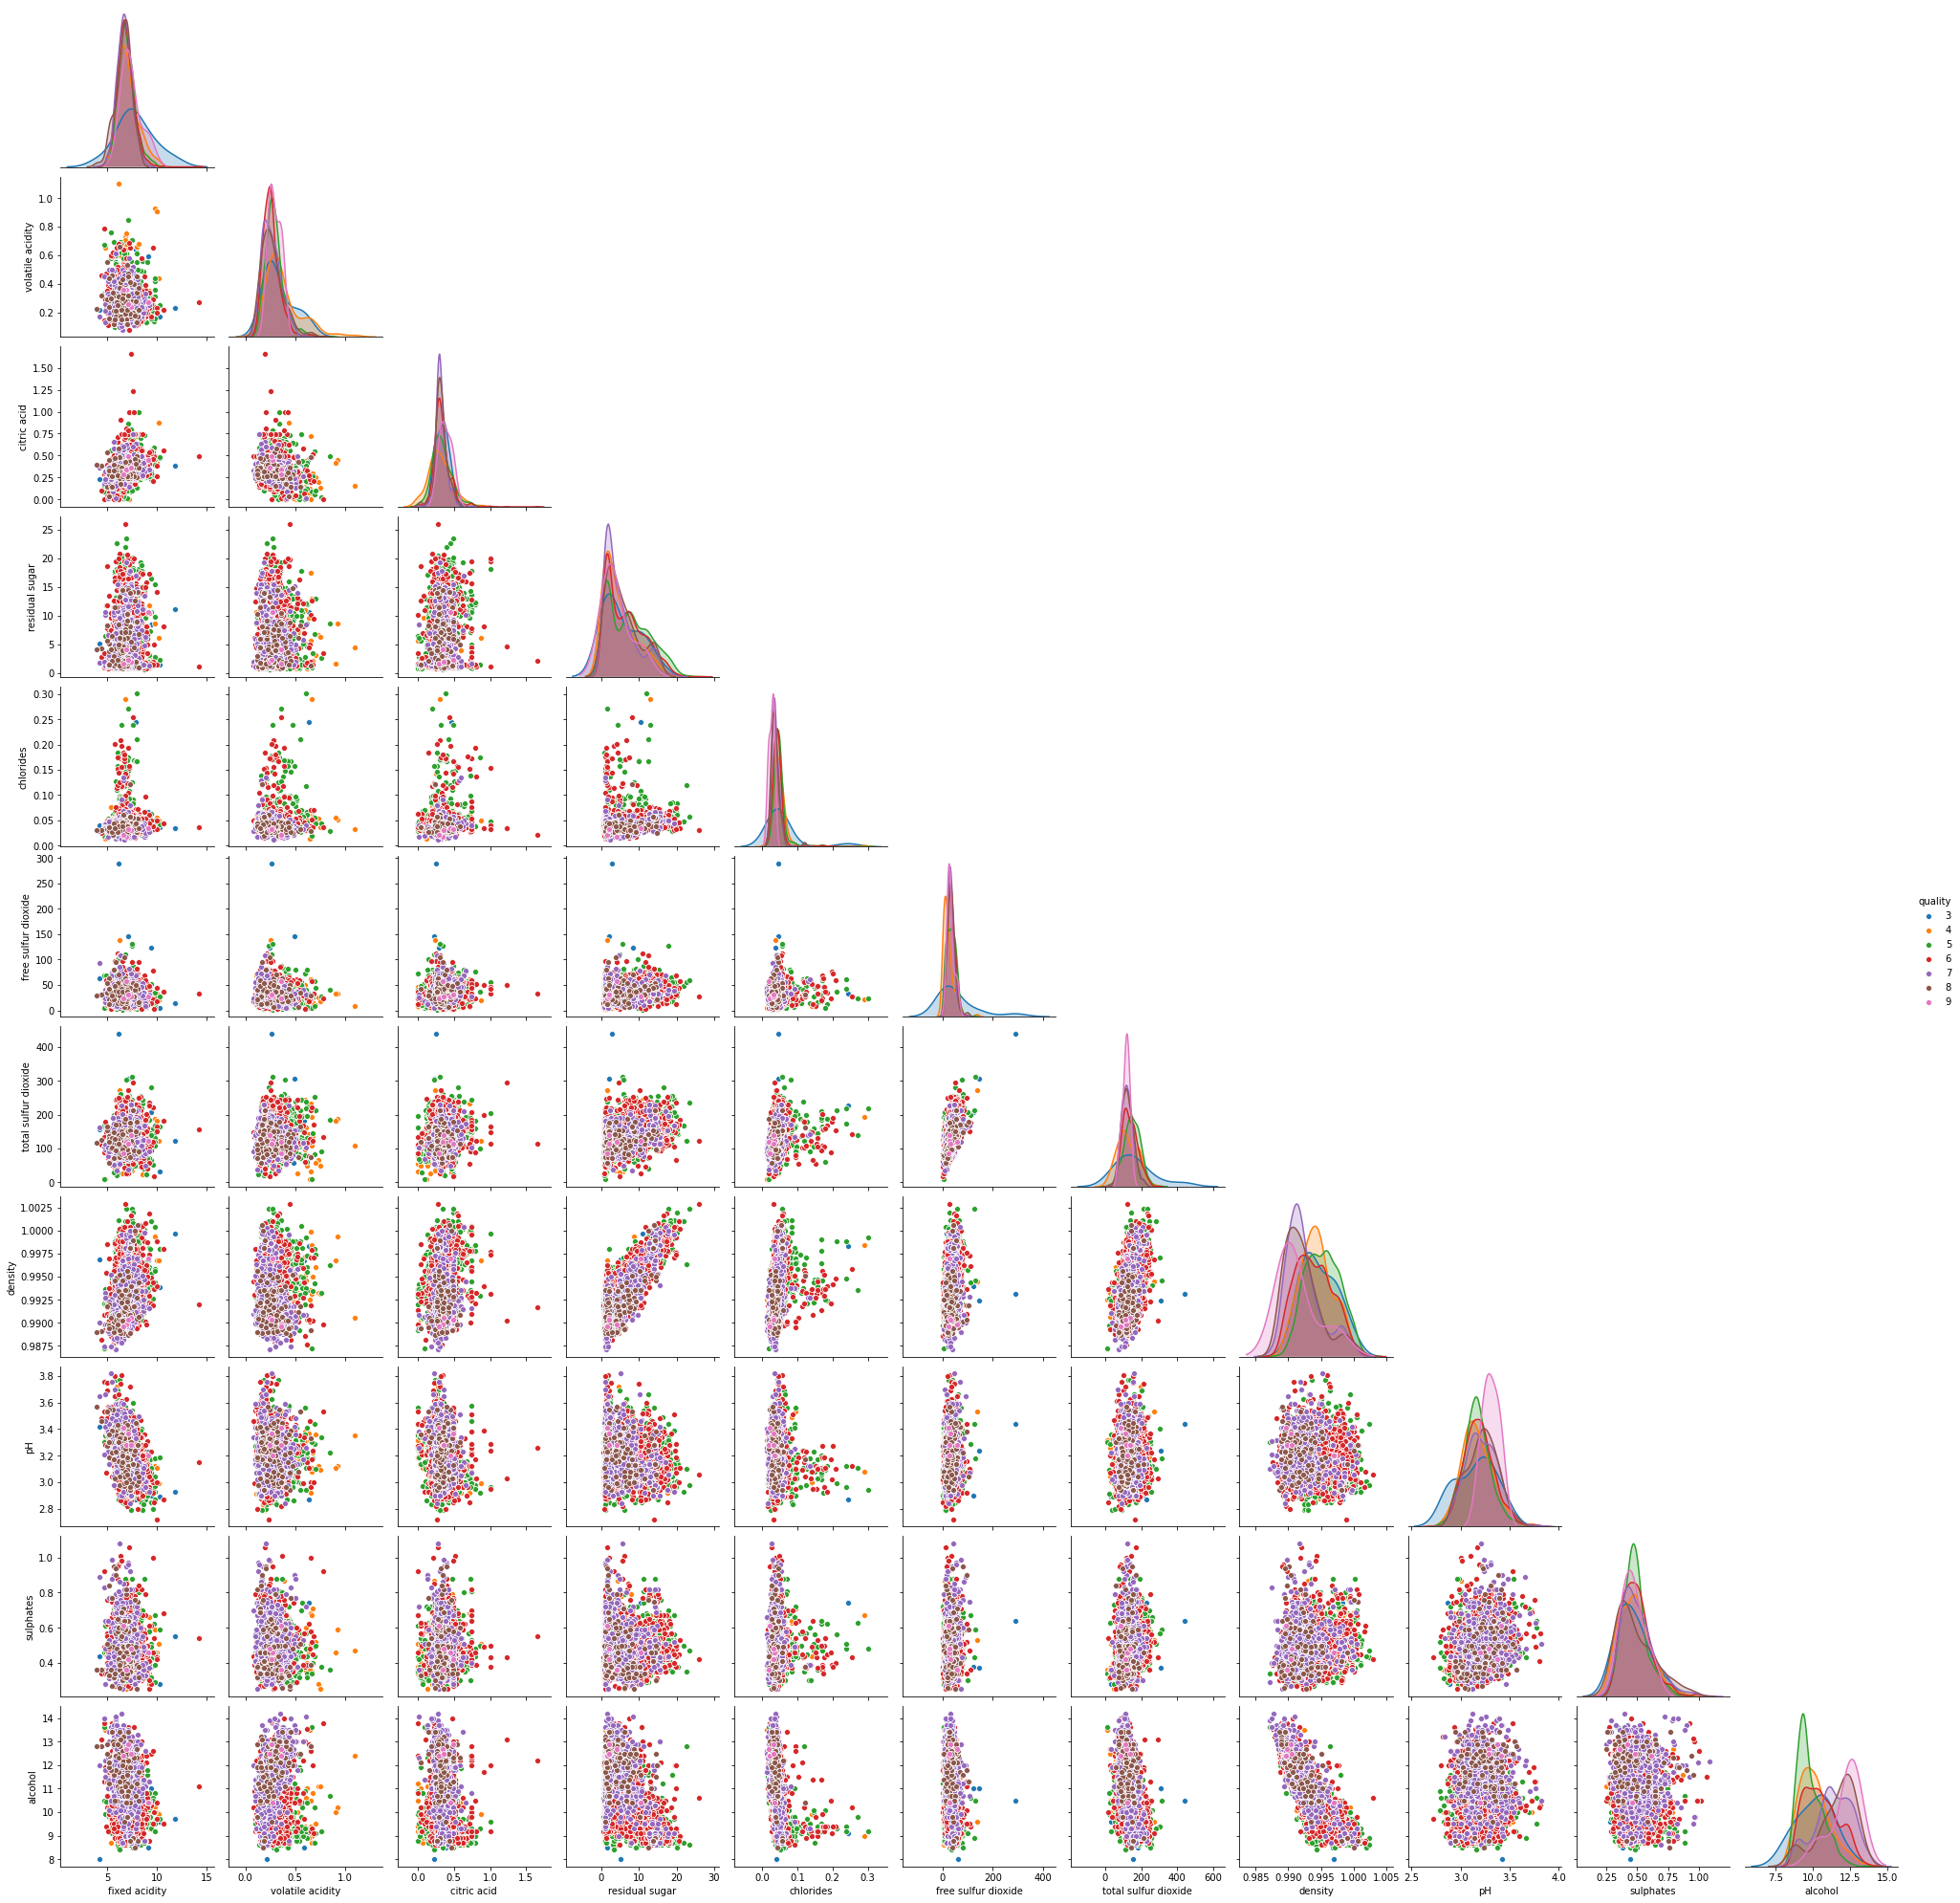

In [5]:
sns.pairplot(white_train, hue="quality", corner=True)

In [5]:
rcols = red.columns[red.columns != 'quality']
red_filtered = red_train[(np.abs(stats.zscore(red_train[rcols])) < 3).all(axis=1)]

wcols = white.columns[white.columns != 'quality']
white_filtered = white_train[(np.abs(stats.zscore(white_train[wcols])) < 3).all(axis=1)]

In [6]:
scaler = StandardScaler()

red_filtered.loc[:,rcols] = scaler.fit_transform(red_filtered.loc[:,rcols])
red_test.loc[:,rcols] = scaler.transform(red_test.loc[:,rcols])

white_filtered.loc[:,wcols] = scaler.fit_transform(white_filtered.loc[:,wcols])
white_test.loc[:,wcols] = scaler.transform(white_test.loc[:,wcols])

/media/amir/Third/Applied_Machine_Learning_S20_Assignments/aml_env/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/media/amir/Third/Applied_Machine_Learning_S20_Assignments/aml_env/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/media/amir/Third/Applied_Machine_Learning_S20_Assignments/aml_env/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWit

In [7]:
red_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 491 to 941
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         974 non-null    float64
 1   volatile acidity      974 non-null    float64
 2   citric acid           974 non-null    float64
 3   residual sugar        974 non-null    float64
 4   chlorides             974 non-null    float64
 5   free sulfur dioxide   974 non-null    float64
 6   total sulfur dioxide  974 non-null    float64
 7   density               974 non-null    float64
 8   pH                    974 non-null    float64
 9   sulphates             974 non-null    float64
 10  alcohol               974 non-null    float64
 11  quality               974 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 98.9 KB


In [8]:
red_filtered.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,9.740000e+02,974.000000
mean,7.696330e-16,-1.367831e-16,2.188530e-17,3.775214e-16,5.981982e-16,-1.003076e-16,-6.747967e-17,-2.770314e-15,-1.213722e-15,-3.063942e-16,3.665788e-16,5.687885
std,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,1.000514e+00,0.793808
min,-2.001542e+00,-2.416653e+00,-1.402435e+00,-1.353345e+00,-1.945333e+00,-1.482130e+00,-1.299374e+00,-3.000562e+00,-3.042765e+00,-2.171826e+00,-1.960619e+00,3.000000
25%,-7.270405e-01,-7.940542e-01,-9.332258e-01,-5.676246e-01,-5.208551e-01,-8.556150e-01,-7.768202e-01,-6.801270e-01,-6.838867e-01,-6.640864e-01,-9.065822e-01,5.000000
50%,-2.415160e-01,-7.289910e-02,-4.694230e-02,-2.308874e-01,-1.343689e-01,-2.291003e-01,-2.891034e-01,9.956200e-04,9.901078e-03,-1.879582e-01,-2.358317e-01,6.000000
75%,5.474613e-01,6.482560e-01,7.872069e-01,2.180955e-01,3.404571e-01,6.062527e-01,5.121455e-01,6.359404e-01,5.649313e-01,6.055888e-01,7.223832e-01,6.000000
max,3.157156e+00,3.112203e+00,2.716177e+00,4.820170e+00,6.535279e+00,3.425569e+00,3.473283e+00,3.175720e+00,3.201325e+00,3.859132e+00,3.022099e+00,8.000000


In [9]:
red_filtered.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
491,0.547461,-0.673862,1.204281,0.105850,-1.194445,-0.333519,-0.637473,-0.864838,0.148659,1.161072,2.734635,7
1380,-0.484278,0.287678,-1.298166,0.218096,-0.222709,-0.437938,-0.289103,-0.651266,0.287416,-0.187958,0.339097,6
434,1.275748,-0.673862,1.464953,0.891570,-0.266878,0.710672,0.372798,1.674941,-1.169538,1.954619,-0.523296,6
402,2.368178,-0.253188,1.412819,0.218096,0.130650,0.397414,0.721167,1.905830,-1.516432,-0.267313,0.051633,6
1328,-1.091184,-0.012803,-0.828957,-0.679870,-0.399388,-0.229100,-0.184593,-0.691671,0.148659,-0.981505,-1.098225,5


In [10]:
red_filtered.to_csv('data/red_train.csv',index=False)
red_test.to_csv('data/red_test.csv',index=False)

white_filtered.to_csv('data/white_train.csv',index=False)
white_test.to_csv('data/white_test.csv',index=False)